# Import Libraries e Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy.stats import mannwhitneyu

In [2]:
# Calculate the Sturges Rule for n elements
def sturges_rule(n):
  k = 1 + (3.322 * np.log10(n))
  return ceil(k)

In [3]:
# Color Palettes
GRAY = ['#BFBFBF', '#737373', '#595959', '#404040', '#262626']
BLUE = ['#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3']
RED = ['#6B100A', '#ED665C', '#EB2315', '#6B2E2A', '#B81C11']

# Importing Data

In [4]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Kaggle/Mobile-User-Behavior/user_behavior_dataset.csv'
data = pd.read_csv(DATA_PATH)
data.head(5)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


Dataset Features:
- **User ID**: Unique identifier for each user.
- **Device Model**: Model of the user's smartphone.
- **Operating System**: The OS of the device (iOS or Android).
- **App Usage Time**: Daily time spent on mobile applications, measured in minutes.
- **Screen On Time**: Average hours per day the screen is active.
- **Battery Drain**: Daily battery consumption in mAh.
- **Number of Apps Installed**: Total apps available on the device.
- **Data Usage**: Daily mobile data consumption in megabytes.
- **Age**: Age of the user.
- **Gender**: Gender of the user (Male or Female).
- **User Behavior Class**: Classification of user behavior based on usage patterns (1 to 5).



# Data Cleaning


In this step we first explore the dataset to get a better understanding of its structure, identify the data type of each feature, as well check if there is any Null/Na or duplicate observation and apply any necessary cleaning.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [6]:
# Check NULLs
data.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [7]:
# Check NAs
data.isna().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [8]:
# Check Duplicates
print(f'Duplicated Registries: {data.duplicated().sum()}')

Duplicated Registries: 0


**Conclusion**:
- The Dataset has a total of 700 lines and as 12 columns.
- We can see there is no Null/Na or duplicate values.
- Although we can also identify that the some features have the dtype 'object', which is better to convert it to 'string' type to make explicit what kind of object e want on it.

In [9]:
for col in data.columns:
  if (data[col].dtype == 'object'):
    data[col] = data[col].astype('string')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    string 
 2   Operating System            700 non-null    string 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    string 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), string(3)
memory usage: 60.3 KB


# Univariate Analysis

Considering the focus of this analysis in identify patterns in mobile devices use, the features singularly more relevant to be analyzed are:
- Operating System
- App Usage Time (min/day)
- Screen On Time (hours/day)
- Number of Apps Installed
- Battery Drain (mAh/day)

## Operating System

In [10]:
os_count = data['Operating System'].value_counts()
os_count = os_count.reset_index()
os_count['percent'] = (os_count['count'] / os_count['count'].sum()) * 100
os_count['percent'] = os_count['percent'].round(2)
os_count

,Operating System,count,percent
0,Android,554,79.14
1,iOS,146,20.86


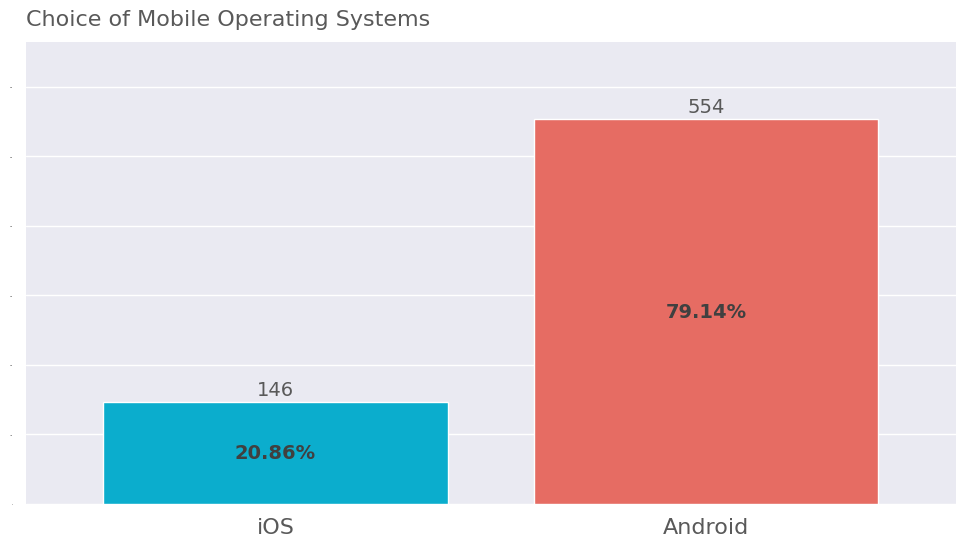

In [11]:
sns.set_theme()
colors = [RED[1], BLUE[2]]
fig, ax = plt.subplots(figsize=(12, 6))

# Graph
ax = sns.barplot(data=os_count, x='Operating System', y='count', hue='Operating System', palette=colors, saturation=0.9, order=['iOS', 'Android'], legend=False)
ax.set_title('Choice of Mobile Operating Systems', fontsize=16, color=GRAY[2], loc='left', pad=12)
ax.set_xlabel('')
ax.set_ylabel('')
sns.despine(left=True, bottom=True)

ax.xaxis.set_tick_params(labelsize=16, labelcolor=GRAY[2])
ax.yaxis.set_tick_params(width=0, labelsize=0)
ax.margins(x=0.1, y=0.2)

for row in os_count.to_numpy():
  ax.text(x=row[0], y=row[1] + 10, s=row[1], horizontalalignment='center', fontsize=14, color=GRAY[2])
  ax.text(x=row[0], y=row[1] / 2, s=f'{row[2]}%', horizontalalignment='center', verticalalignment='center', fontsize=14, color=GRAY[3], fontweight='bold')

plt.show()

**Conclusion**:
- Its easily visible, the majority of the users use Android, being the quantity of Android users almost four times more than iOS users.

## App Usage Time and Screen On Time



Considering that the following features are similar, explain very similar concepts, and are strongly correlated, I think it is efficient to analyze them together while simultaneously visualizing how they differ from each other.

In [12]:
app_usage = data['App Usage Time (min/day)']
app_usage = app_usage.rename('mins/day')
app_usage = app_usage.to_frame()
app_usage['hours/day'] = (app_usage / 60).round(1)
app_usage.head(5)

,mins/day,hours/day
0,393,6.6
1,268,4.5
2,154,2.6
3,239,4.0
4,187,3.1


In [13]:
app_usage['hours/day'].describe().rename('App Usage Time (hours/day)')

,App Usage Time (hours/day)
count,700.000000
mean,4.517286
std,2.952708
min,0.500000
25%,1.875000
50%,3.800000
75%,7.225000
max,10.000000


In [14]:
data['Screen On Time (hours/day)'].describe()

,Screen On Time (hours/day)
count,700.000000
mean,5.272714
std,3.068584
min,1.000000
25%,2.500000
50%,4.900000
75%,7.400000
max,12.000000


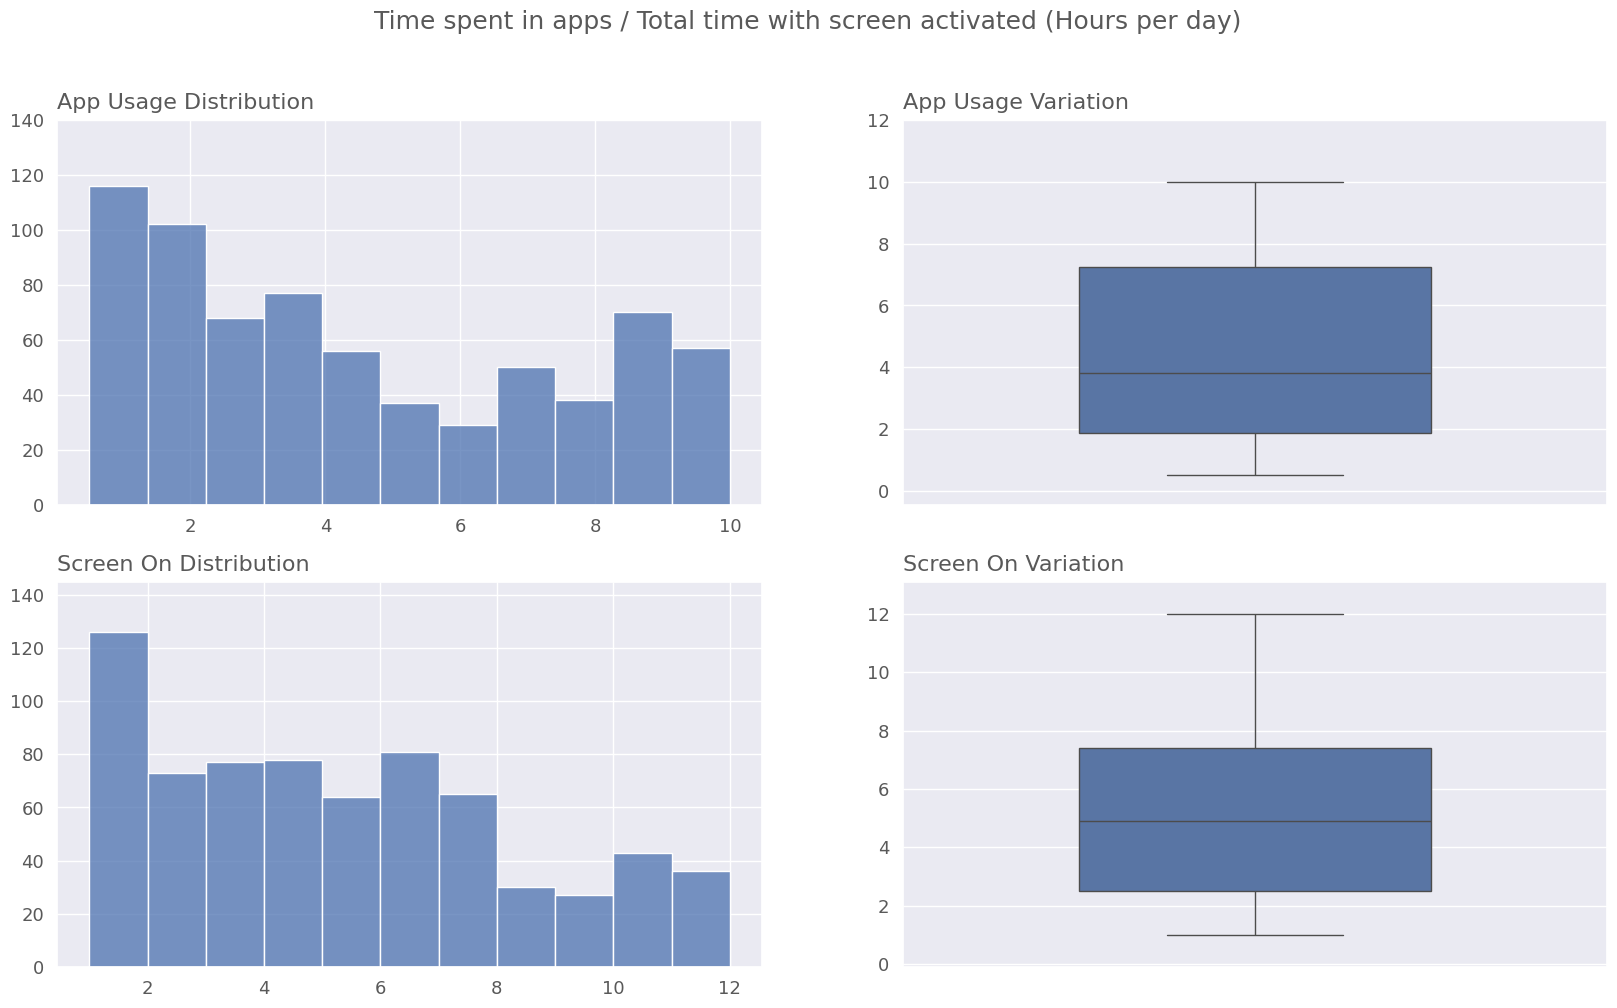

In [15]:
sns.set_theme()
fig, axs = plt.subplots(2, 2, figsize=(20, 11))
fig.suptitle("Time spent in apps / Total time with screen activated (Hours per day)", fontsize=18, color=GRAY[2])

# App Usage
# Histogram
sns.histplot(data=app_usage, x='hours/day', bins=sturges_rule(app_usage.shape[0]), ax=axs[0][0])
axs[0][0].set_title("App Usage Distribution", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[0][0].set_xlabel('')
axs[0][0].set_ylabel('')
axs[0][0].margins(x=0.05, y=0.15)
axs[0][0].xaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0][0].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0][0].set_yticks(range(0, 141, 20))

# Boxplot
sns.boxplot(data=app_usage['hours/day'], ax=axs[0][1])
axs[0][1].set_title("App Usage Variation", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[0][1].set_ylabel('')
axs[0][1].margins(x=0.50, y=0.1)
axs[0][1].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0][1].set_yticks(range(0, 13, 2))


# Screen on Time
# Histogram
sns.histplot(data=data, x='Screen On Time (hours/day)', bins=sturges_rule(data['Screen On Time (hours/day)'].shape[0]), ax=axs[1][0])
axs[1][0].set_title("Screen On Distribution", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[1][0].set_xlabel('')
axs[1][0].set_ylabel('')
axs[1][0].margins(x=0.05, y=0.15)
axs[1][0].xaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[1][0].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[1][0].set_yticks(range(0, 141, 20))

# Boxplot
sns.boxplot(data=data['Screen On Time (hours/day)'], ax=axs[1][1])
axs[1][1].set_title("Screen On Variation", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[1][1].set_ylabel('')
axs[1][1].margins(x=0.50, y=0.1)
axs[1][1].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[1][1].set_yticks(range(0, 13, 2))

plt.show()

**Conclusion**:

App Usage Time
- In the distribution we can see there is concentration of users whose the time spent varies 1-4 hours.
- After that concentration, the rest of the sample is well distributed, having a little low point in 6 hours.

Screen On Time
- In the distribution we can see a peak of users whose the time is less than 2 hours, furthermore the rest of distribution is well distributed.

Both
- They are very similar, being the "Screen On Time" in average slightly greater than "App Usage Time".
- There is no visible Outliers in any of them.


## Number of Apps Installed


In [16]:
data['Number of Apps Installed'].describe()

,Number of Apps Installed
count,700.000000
mean,50.681429
std,26.943324
min,10.000000
25%,26.000000
50%,49.000000
75%,74.000000
max,99.000000


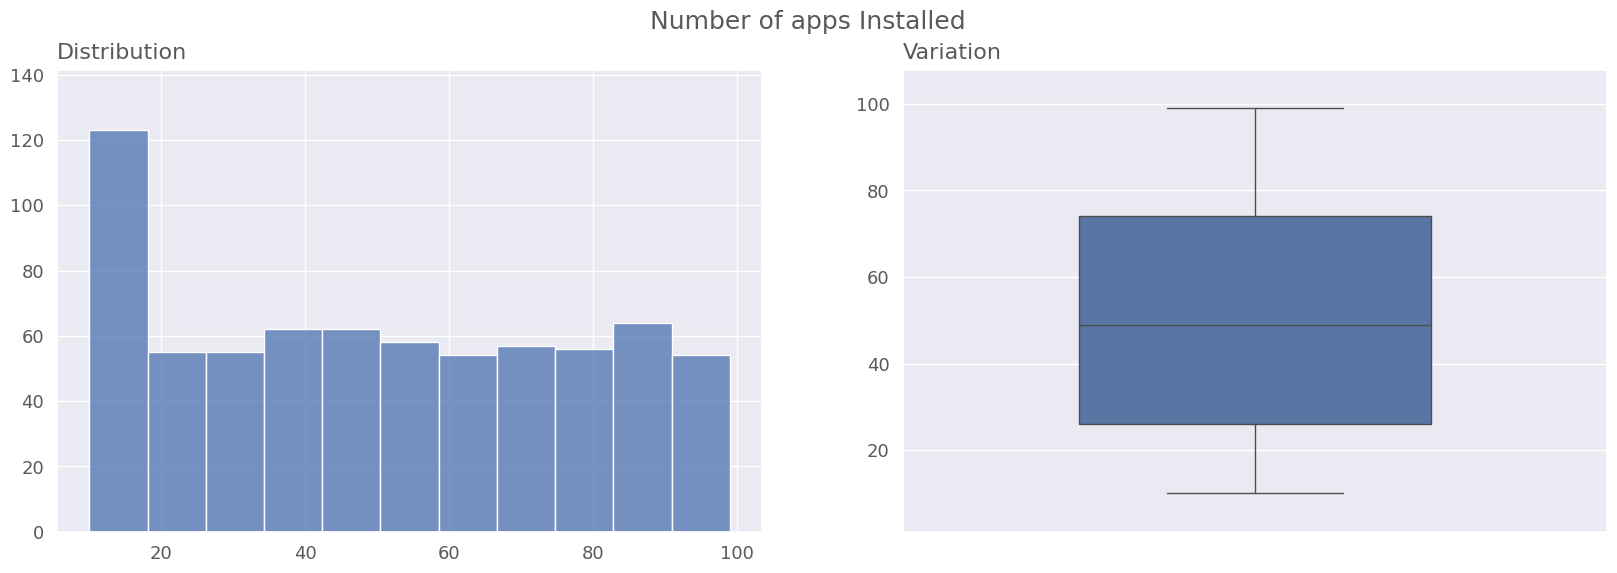

In [17]:
sns.set_theme()
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Number of apps Installed', fontsize=18, color=GRAY[2])

# Histogram
sns.histplot(data=data, x='Number of Apps Installed', ax=axs[0])
axs[0].set_title("Distribution", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].margins(x=0.05, y=0.15)
axs[0].xaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0].set_yticks(range(0, 141, 20))

# Boxplot
sns.boxplot(data=data['Number of Apps Installed'], ax=axs[1])
axs[1].set_title("Variation", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[1].set_ylabel('')
axs[1].margins(x=0.50, y=0.1)
axs[1].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])

plt.show()

**Conclusion**:
- In the distribution, we have a peak of users whose use equal or less than 20 apps.
- The rest is well distributed around the number of 45 to 65 users for each group of number of apps.
- About the variation, what is interesting is that we can observe an almost perfect variation between 10 and 100, where the mean is almost 50, the 1° quartile is almost 25, the 3° almost 75 and a standard deviation of almost 25 too.
- Also no visible Outliers

## Battery Drain

In [18]:
data['Battery Drain (mAh/day)'].describe()

,Battery Drain (mAh/day)
count,700.000000
mean,1525.158571
std,819.136414
min,302.000000
25%,722.250000
50%,1502.500000
75%,2229.500000
max,2993.000000


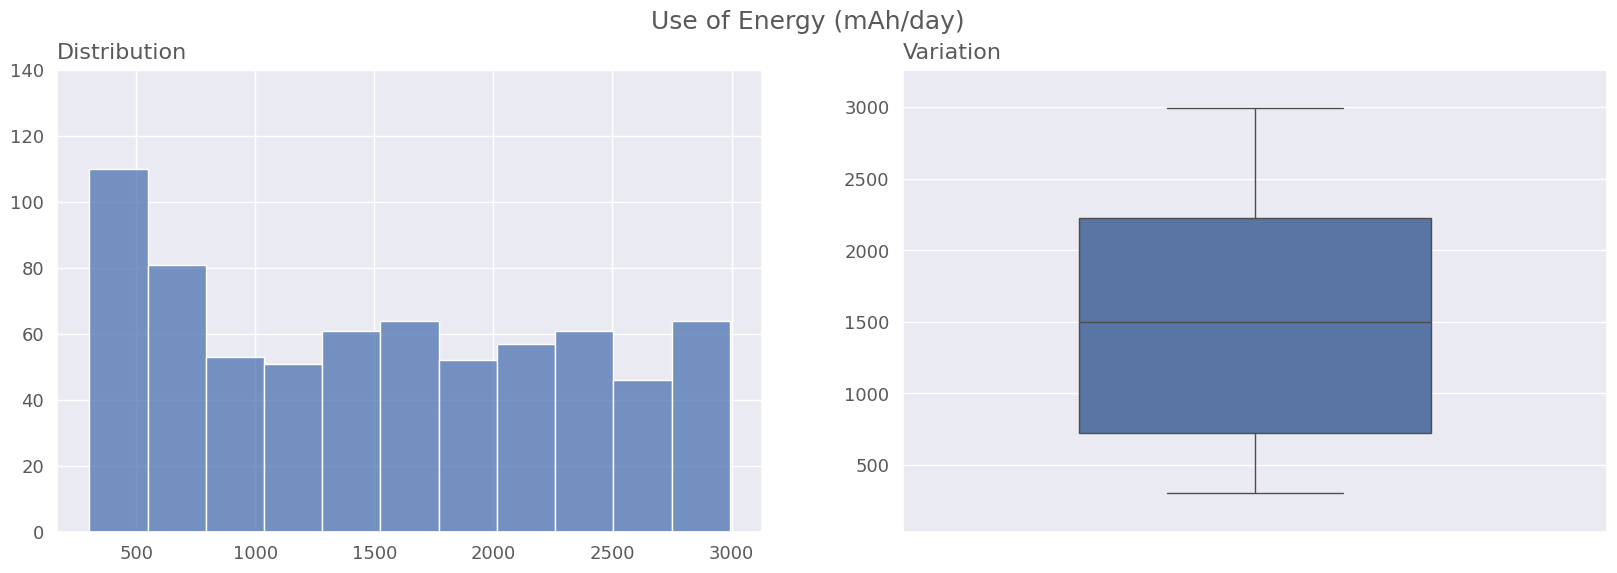

In [19]:
sns.set_theme()
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Use of Energy (mAh/day)', fontsize=18, color=GRAY[2])

# Histogram
sns.histplot(data=data, x='Battery Drain (mAh/day)', ax=axs[0])
axs[0].set_title("Distribution", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].margins(x=0.05, y=0.15)
axs[0].xaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])
axs[0].set_yticks(range(0, 141, 20))

# Boxplot
sns.boxplot(data=data['Battery Drain (mAh/day)'], ax=axs[1])
axs[1].set_title("Variation", fontsize=16, color=GRAY[2], loc='left', pad=8)
axs[1].set_ylabel('')
axs[1].margins(x=0.50, y=0.1)
axs[1].yaxis.set_tick_params(labelsize=13, labelcolor=GRAY[2])

plt.show()

**Conclusion**:
- The distribution is very similar to all the other variables, with a little peak at the first values and a well distribution for the rest of the data.
- No visible outliers
- Define How much energy is being used

# Bivariate Analysis

## Correlation Matrix

In [20]:
qualitative_vars = ['Device Model', 'Operating System', 'Gender']
quantitative_vars = ['App Usage Time (min/day)', 'Screen On Time (hours/day)','Battery Drain (mAh/day)', 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age']

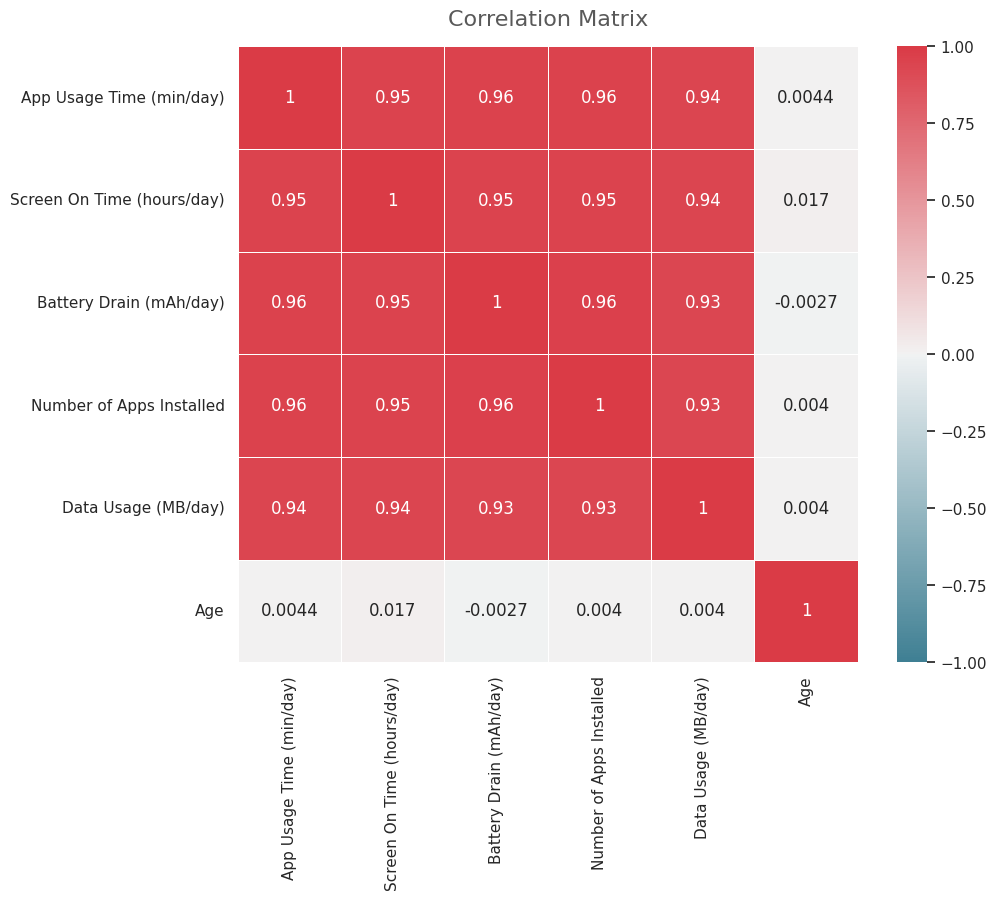

In [21]:
# Correlation Matrix
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data[quantitative_vars].corr(), cmap=cmap, vmax=1, vmin=-1, center=0, annot=True, linewidths=0.5)
ax.set_title('Correlation Matrix', loc='center', fontsize=16, color=GRAY[2], pad=15)
plt.show()

**Conclusion**:
- As we can see, all features are strongly correlated, except for 'Age,' which appears uncorrelated, showing neither a positive nor negative relationship.
- Considering that longer 'Screen On Time' corresponds to increased application usage and, consequently, higher energy consumption and data bandwidth usage, the observed correlation is entirely logical.

## Gender x Operating System  

In [22]:
cross_os_gen = pd.crosstab(data['Operating System'], data['Gender']).sort_values(by='Male', ascending=True)
pd.crosstab(data['Operating System'], data['Gender'], margins=True).sort_values(by='All', ascending=True)

Gender,Female,Male,All
Operating System,,,
iOS,74,72,146
Android,262,292,554
All,336,364,700


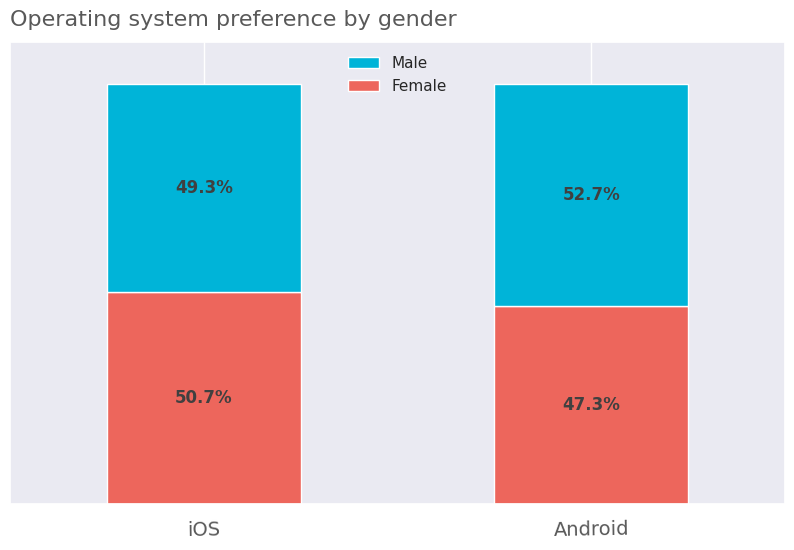

In [23]:
colors = [RED[1], BLUE[2]]

percent_os_gen = cross_os_gen.reset_index()[['Female', 'Male']].div(cross_os_gen.reset_index()[['Female', 'Male']].sum(axis=1), axis=0) * 100
percent_os_gen.index = ['iOS', 'Android']

ax = percent_os_gen.plot(kind='bar',  stacked=True, color=colors, figsize=(10, 6))
ax.set_title('Operating system preference by gender', fontsize=16, color=GRAY[2], loc='left', pad=12)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticks([])
ax.tick_params(axis='x', colors=GRAY[2], pad=5, labelsize=14, labelrotation=1)
ax.margins(x=0.1, y=0.1)
ax.legend(loc=9, frameon=False, reverse=True)

for n, container in enumerate(ax.containers):
  labels = [f'{label}%' for label in percent_os_gen.transpose().round(1).to_numpy()[n]]
  ax.bar_label(container=container, labels=labels, label_type='center', size = 12, color = GRAY[3], fontweight = "bold")

plt.show()

## Gender x Screen On Time

In [31]:
scon_gen = data[['Screen On Time (hours/day)', 'Gender']]
scon_gen.head(5)

,Screen On Time (hours/day),Gender
0,6.4,Male
1,4.7,Female
2,4.0,Male
3,4.8,Male
4,4.3,Female


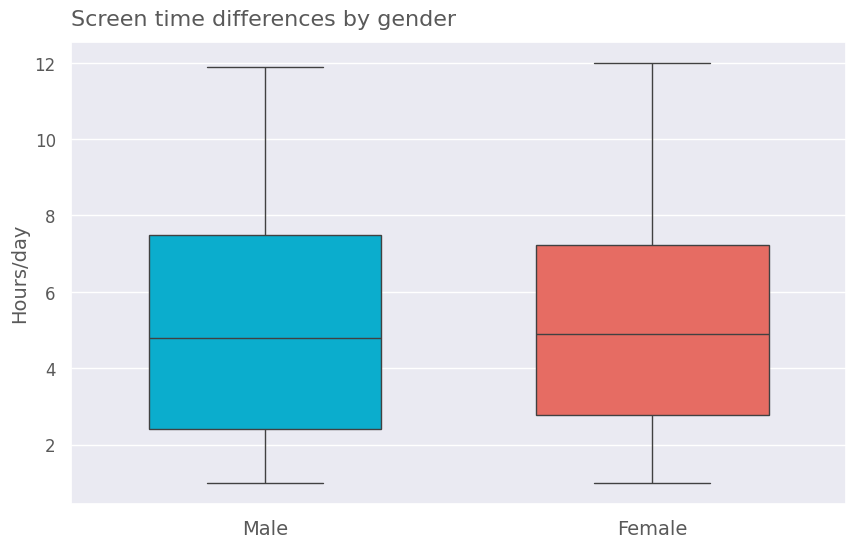

In [50]:
colors = [BLUE[2], RED[1]]

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=scon_gen, x='Gender', y='Screen On Time (hours/day)', hue='Gender', palette=colors, saturation=0.9, width=0.6, ax=ax)
ax.set_title('Screen time differences by gender', fontsize=16, color=GRAY[2], loc='left', pad=12)
ax.set_xlabel('')
ax.set_ylabel('Hours/day', fontsize=14, color=GRAY[2])
ax.tick_params(axis='x', colors=GRAY[2], pad=5, labelsize=14)
ax.tick_params(axis='y', colors=GRAY[2], pad=5, labelsize=12)

plt.show()

**Mann-Whitney Test**
- **H0**: The Screen Time habits of both genders are equal
- **H1**: There are significant differences in screen time habits between genders
- **Significance Level**: 5%

In [33]:
SEED = 8
m_sample = scon_gen.query('Gender=="Male"')['Screen On Time (hours/day)'].sample(200, random_state=SEED)
f_sample = scon_gen.query('Gender=="Female"')['Screen On Time (hours/day)'].sample(200, random_state=SEED)

stat, p = mannwhitneyu(m_sample, f_sample, alternative='two-sided')

In [34]:
print(f"U Statistic: {stat}")
print(f"P-value: {p}")

U Statistic: 19620.0
P-value: 0.7426969987975249


In [35]:
if p < 0.05:
    print("Reject the null hypothesis: Significant difference between the genders.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the genders.")

Fail to reject the null hypothesis: No significant difference between the genders.


## Gender x Battery Drain

In [29]:
bd_gen = data[['Battery Drain (mAh/day)', 'Gender']]
bd_gen.head(5)

,Battery Drain (mAh/day),Gender
0,1872,Male
1,1331,Female
2,761,Male
3,1676,Male
4,1367,Female


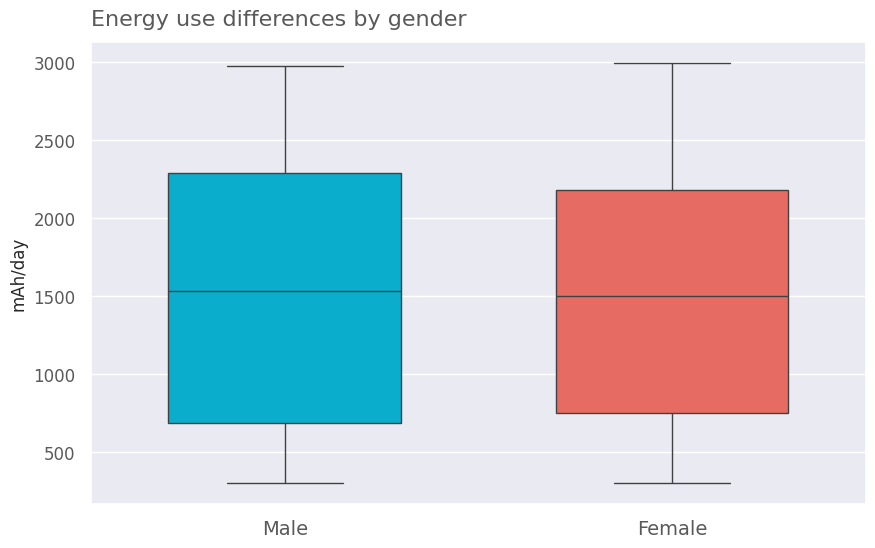

In [30]:
colors = [BLUE[2], RED[1]]

fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=bd_gen, x='Gender', y='Battery Drain (mAh/day)', hue='Gender', palette=colors, saturation=0.9, width=0.6)
ax.set_title('Energy use differences by gender', fontsize=16, color=GRAY[2], loc='left', pad=12)
ax.set_xlabel('')
ax.set_ylabel('mAh/day')
ax.tick_params(axis='x', colors=GRAY[2], pad=5, labelsize=14)
ax.tick_params(axis='y', colors=GRAY[2], pad=5, labelsize=12)

plt.show()

## Age x Screen on Time

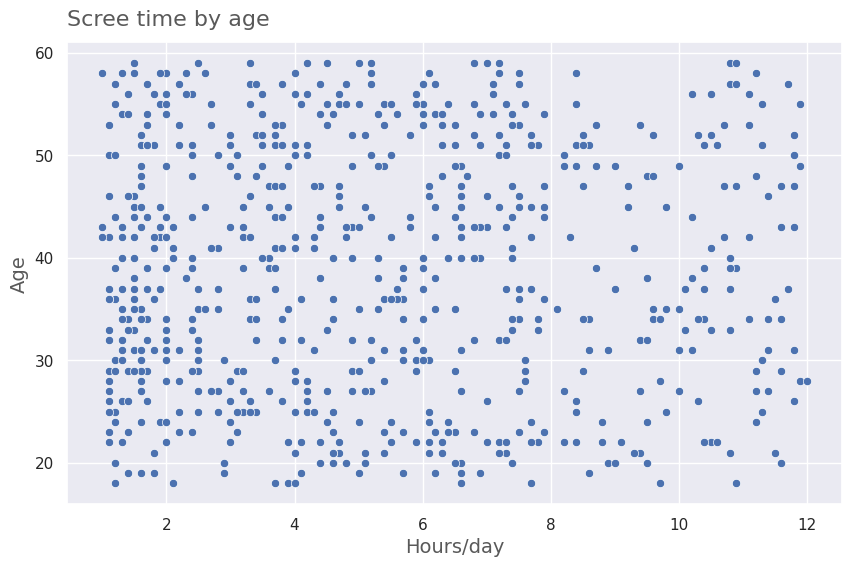

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(ax=ax, x=data['Screen On Time (hours/day)'], y=data['Age'])
ax.set_title('Scree time by age', fontsize=16, color=GRAY[2], loc='left', pad=12)
ax.set_xlabel('Hours/day',fontsize=14, color=GRAY[2])
ax.set_ylabel('Age',fontsize=14, color=GRAY[2])

plt.show()

## Age x Number of Apps Installed

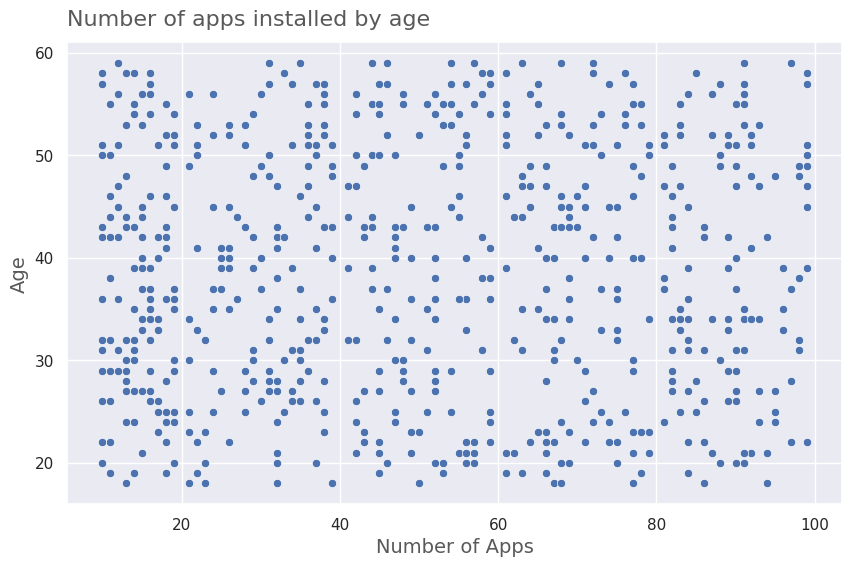

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(ax=ax, x=data['Number of Apps Installed'], y=data['Age'])
ax.set_title('Number of apps installed by age', fontsize=16, color=GRAY[2], loc='left', pad=12)
ax.set_xlabel('Number of Apps',fontsize=14, color=GRAY[2])
ax.set_ylabel('Age',fontsize=14, color=GRAY[2])

plt.show()